In [8]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
from scipy.integrate import simpson
from matplotlib import pyplot as plt
from activations import hard, soft, soft_q, hard_q, correlation_map

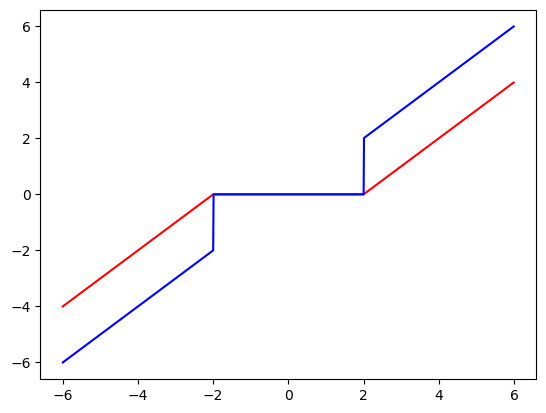

In [12]:
x_axis = np.arange( -6, 6, 0.01 )
tau = 2
res_soft = np.array( [ soft( x, tau ) for x in x_axis ] )
res_hard = np.array( [ hard( x, tau ) for x in x_axis ] )
plt.plot( x_axis, res_soft, "r-" )
plt.plot( x_axis, res_hard , "b-" )

In [13]:
sigma_b = 0.7
sigma_w = 0.7
tau = 1
soft_q( 1, sigma_b, sigma_w, tau )

0.5638327897533097

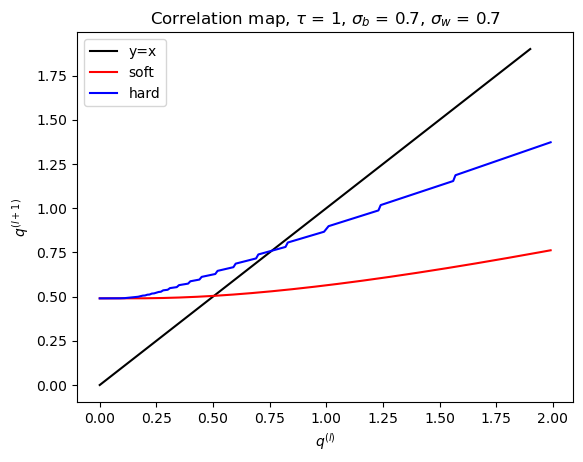

In [14]:

ex = np.arange( 0, 2, 0.01)
res_soft = np.array( [ soft_q( x, sigma_b, sigma_w, tau = 1 ) for x in ex ] )
res_hard = np.array( [ hard_q( x, sigma_b, sigma_w, tau = 1 ) for x in ex ] )
fig, ax = plt.subplots()
ax.plot( ex[ ::10], ex[::10], "k-" )
ax.plot( ex, res_soft, "r-")
ax.plot( ex, res_hard, "b-")
plt.title( f"Length map, $\\tau$ = {tau}, $\\sigma_b$ = {sigma_b}, $\\sigma_w$ = {sigma_w}")
plt.xlabel( "$q^{(l)}$")
plt.ylabel( "$q^{(l+1)}$")
plt.legend( [ "y=x", "soft", "hard"])

In future will solve for q* explicitly. For now notice that with these parameters q* = 0.5 for soft activation

In [15]:
q_star_soft = 0.5
q_star_hard = 0.75

In [28]:
correlation_map( soft, 0.5,0.5, 0.5, sigma_b, sigma_w, 1 ) 

0.49392186397383686

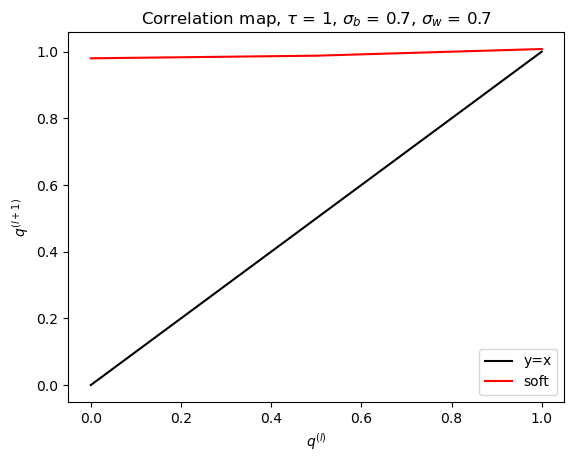

In [31]:
ex = np.array([ 0,0.5, 1])
res_soft = 1/q_star_soft * np.array( [ correlation_map( soft, x,q_star_soft,q_star_soft, sigma_b, sigma_w, 1 ) for x in ex ] )
# Hard activation takes ages to run for some reason
#res_hard = 1/q_star_soft * np.array( [ correlation_map( hard, x, q_star_hard, q_star_soft, sigma_b, sigma_w, 1 ) for x in ex ] )
fig, ax = plt.subplots()
ax.plot( ex[ ::], ex[::], "k-" )
ax.plot( ex, res_soft, "r-")
#ax.plot( ex, res_hard, "b-")
plt.title( f"Correlation map, $\\tau$ = {tau}, $\\sigma_b$ = {sigma_b}, $\\sigma_w$ = {sigma_w}")
plt.xlabel( "$q^{(l)}$")
plt.ylabel( "$q^{(l+1)}$")
plt.legend( [ "y=x", 
    "soft", ])
    #"hard"])